In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

**The executable pycbc_inference is designed to sample the parameter space and save the samples in an HDF file.**

**A high-level description of the pycbc_inference algorithm is:**

**1. Read priors from a configuration file.**

**2. Setup the model to use. If the model uses data, then:**

**<li>Read gravitational-wave strain from a gravitational-wave model or use recolored fake strain.</li>**

**<li>Estimate a PSD.</li>**

**3. Run a sampler to estimate the posterior distribution of the model.**

**4. Write the samples and metadata to an HDF file.**

**The model, data, sampler, parameters to vary and their priors are specified in one or more configuration files, which are passed to the program using the --config-file option. Other command-line options determine what parallelization settings to use. For a full listing of all options run pycbc_inference --help.**

In [3]:
# Importing required libraries

from __future__ import print_function

from IPython.display import Image
from IPython.core.display import HTML

# Example: 2D Normal Distribution

**How to sample a 2D Normal Distribution with the "emcee" sampler.**

## The configuration file (normal2d.ini)

**In order to do parameter estimation run, we need  a configuration file.<br>This tells "pycbc_inference" that: <li>what parameters we will sample</li><li>what prior to use</li><li>the model that we are sampling</li><li>what sample to use.</li>**

**When looking at the file, note the following:**

**<li>We have selected the analytic distribution to run on by setting the model name to test_normal. This causes us to run using the TestNormal model.</li><li>The number of dimensions of the analytical distribution are set by the number of parameters in the [variable_params] section</li><li>The prior to use for each parameter is set with the [prior-{param}] sections</li><li>The names of the prior do not matter, just that the prior sections use the same names.</li><li>The settings to use for the sampler (in this case emcee) are set in the [sampler] section.</li>**

## Run pycbc_inference

In [10]:
!pycbc_inference --verbose \
        --config-files normal2d.ini \
        --output-file normal2d.hdf \
        --force \
        --nprocesses 2 \
        --seed 10

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1
2023-04-06T00:42:01.603-04:00 Using seed 10
2023-04-06T00:42:01.603-04:00 Running with CPU support: 1 threads
2023-04-06T00:42:01.667-04:00 Reading configuration file
2023-04-06T00:42:01.669-04:00 Setting up model
2023-04-06T00:42:01.669-04:00 Setting up priors for each parameter
2023-04-06T00:42:01.670-04:00 No sampling_params section read from config file
2023-04-06T00:42:01.670-04:00 Setting up sampler
2023-04-06T00:42:01.679-04:00 Looking for checkpoint file
2023-04-06T00:42:01.680-04:00 Checkpoint not found or not valid
2023-04-06T00:42:01.680-04:00 Creating file normal2d.hdf.checkpoint
2023-04-06T00:42:01.695-04:00 Running sampler for 0 to 200 iterations
2023-04-06T00:42:09.590-04:00 Writing samples to normal2d.hdf.checkpoint with thin interval 1
2023-04-06T00:42:09.690-04:00 Writing samples to normal2d.hdf.bkup with thin interval 1
2023-04-06T00:42:09.795-04:00 Updating burn in
2023-04-06T00:42:09.795-04:00 Evaluatin

**This created an output file called normal2d.hdf, which contains the samples**

## Plot posterior samples

### Scatterplot of the posterior

**The most often used is "pycbc_inference_plot_posterior". This program reads the output hdf file and plots the posteriors. Let's run that to see our results:**

In [11]:
!pycbc_inference_plot_posterior --verbose \
        --input-file normal2d.hdf \
        --output-file posterior-normal2d.png \
        --parameters x y \
        --plot-scatter \
        --plot-contours \
        --plot-marginal \
        --z-arg 'loglikelihood:$\log p(h|\vartheta)$'

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1
2023-04-06T00:43:20.609-04:00 Reading input file normal2d.hdf
2023-04-06T00:43:20.610-04:00 Loading samples
2023-04-06T00:43:20.617-04:00 Loaded 9000 samples
2023-04-06T00:43:20.617-04:00 Getting samples for colorbar
2023-04-06T00:43:20.622-04:00 Plotting
2023-04-06T00:43:23.201-04:00 Done


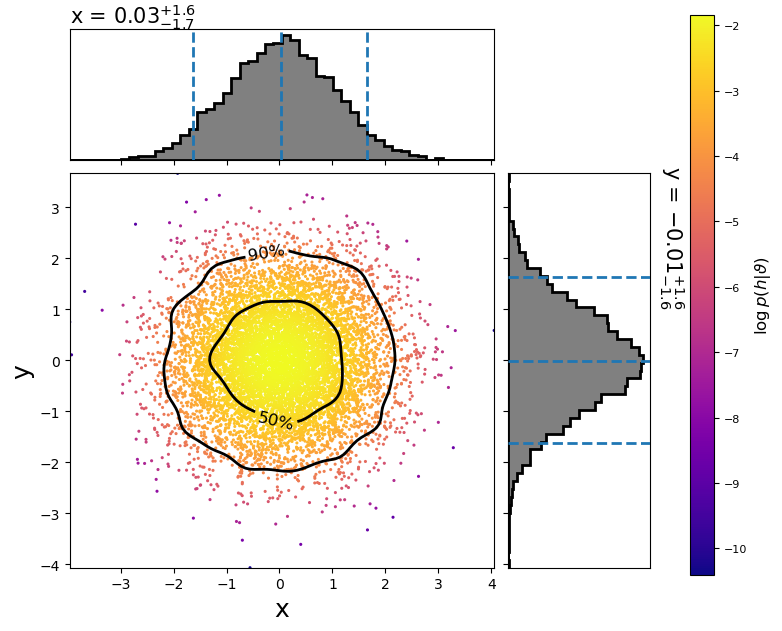

In [12]:
Image(filename = "posterior-normal2d.png", width = 640, height = 480)

**The scatter points show each walker's position after the last iteration. The points are colored by the log likelihood at that point, with the 50th and 90th percentile contours drawn.**

### Density plot of the posterior

In [13]:
!pycbc_inference_plot_posterior --verbose \
        --input-file normal2d.hdf \
        --output-file density-normal2d.png \
        --parameters x y \
        --plot-density \
        --plot-contours \
        --plot-marginal

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1
2023-04-06T00:45:27.063-04:00 Reading input file normal2d.hdf
2023-04-06T00:45:27.064-04:00 Loading samples
2023-04-06T00:45:27.071-04:00 Loaded 9000 samples
2023-04-06T00:45:27.072-04:00 Plotting
2023-04-06T00:45:29.408-04:00 Done


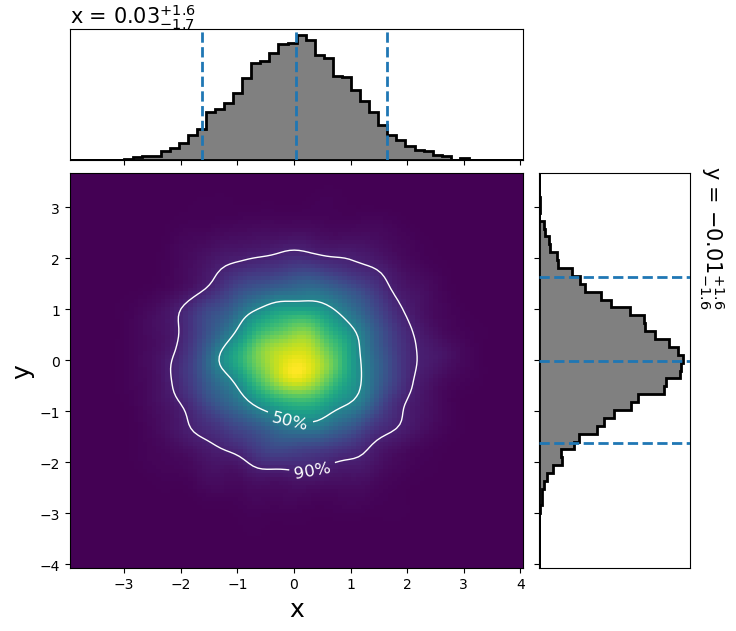

In [14]:
Image(filename="density-normal2d.png", width=640, height=480)

## Diagnostic Plots (MCMC)

### The autocorrelation function

**The program pycbc_inference_plot_acf calculates the autocorrelation function (ACF) of each parameter chain, and plots it. By default, the autocorrelation function is only calculated over the iterations post burn-in (in this case, the second half of the chains).**

In [15]:
!pycbc_inference_plot_acf --input-file normal2d.hdf \
    --output-file plotacf.png \
    --parameters x y \
    --verbose

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1
2023-04-06T00:46:21.890-04:00 Loading parameters
2023-04-06T00:46:21.890-04:00 Reading input file normal2d.hdf
2023-04-06T00:46:21.892-04:00 Calculating autocorrelation functions
2023-04-06T00:46:21.990-04:00 Plotting autocorrelation functions
2023-04-06T00:46:22.016-04:00 Parameter x
2023-04-06T00:46:22.018-04:00 Parameter y
2023-04-06T00:46:22.183-04:00 Done


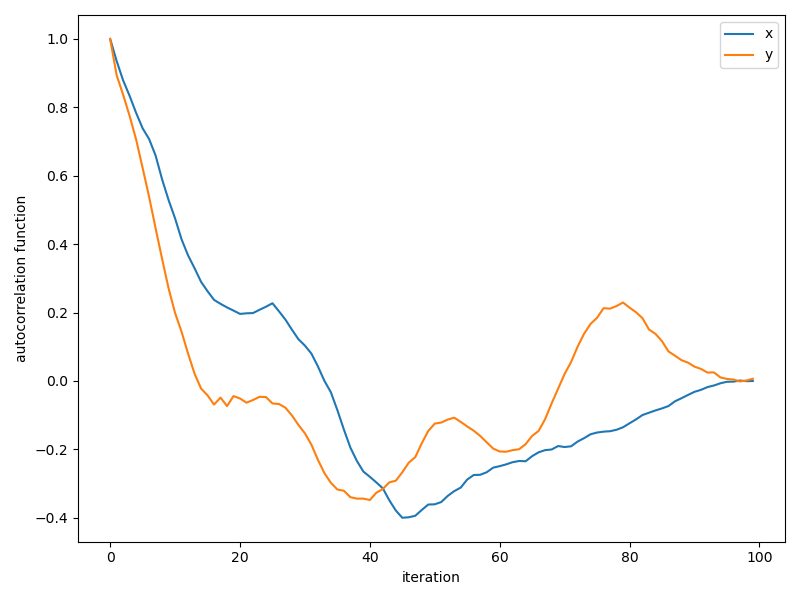

In [16]:
Image(filename="plotacf.png", width=640, height=480)

### The autocorrelation time

**The program pycbc_inference_plot_acl calculates and plots the autocorrelation length (ACL) of each chain and histograms the result.**

In [17]:
!pycbc_inference_plot_acl --input-file normal2d.hdf \
    --output-file plotacl.png \
    --verbose

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1
2023-04-06T00:47:28.436-04:00 Reading input file normal2d.hdf
2023-04-06T00:47:28.437-04:00 Calculating autocorrelation length
2023-04-06T00:47:31.899-04:00 Plotting autocorrelation times
2023-04-06T00:47:35.049-04:00 Plotting autocorrelation times
2023-04-06T00:47:35.169-04:00 Done


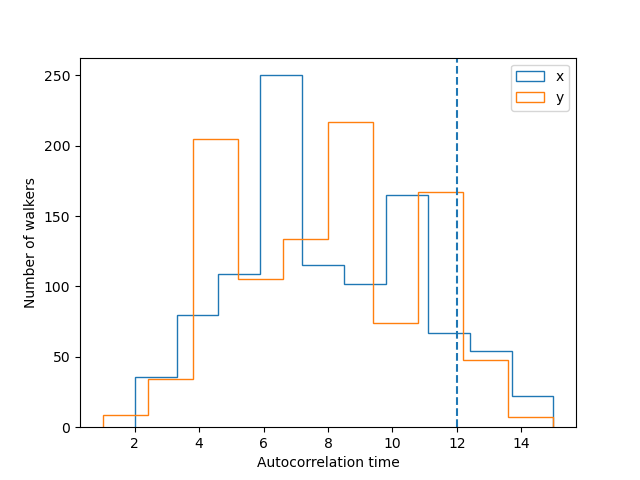

In [18]:
Image(filename="plotacl.png", width=640, height=480)

### Chain Plots

**The program "pycbc_inference_plot_samples" will plot each parameter as a function of iteration.**

**Note that we provide --thin-start 0 and --thin-interval 1 arguments.<br>This is so we can see the entire chain, with every iteration plotted.<br>Without them, the program will read samples starting from the burn in iteration (in this case, the halfway point), thinned by the autocorrelation length.<br>This is true of any program that has these thin-start/thin-interval options.**

In [19]:
!pycbc_inference_plot_samples --verbose \
    --input-file normal2d.hdf \
    --output-file samples_chain.png \
    --parameters x y \
    --thin-start 0 \
    --thin-interval 1

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1
2023-04-06T00:49:18.674-04:00 Reading input file normal2d.hdf
2023-04-06T00:49:18.675-04:00 Plotting samples
2023-04-06T00:49:22.787-04:00 Done


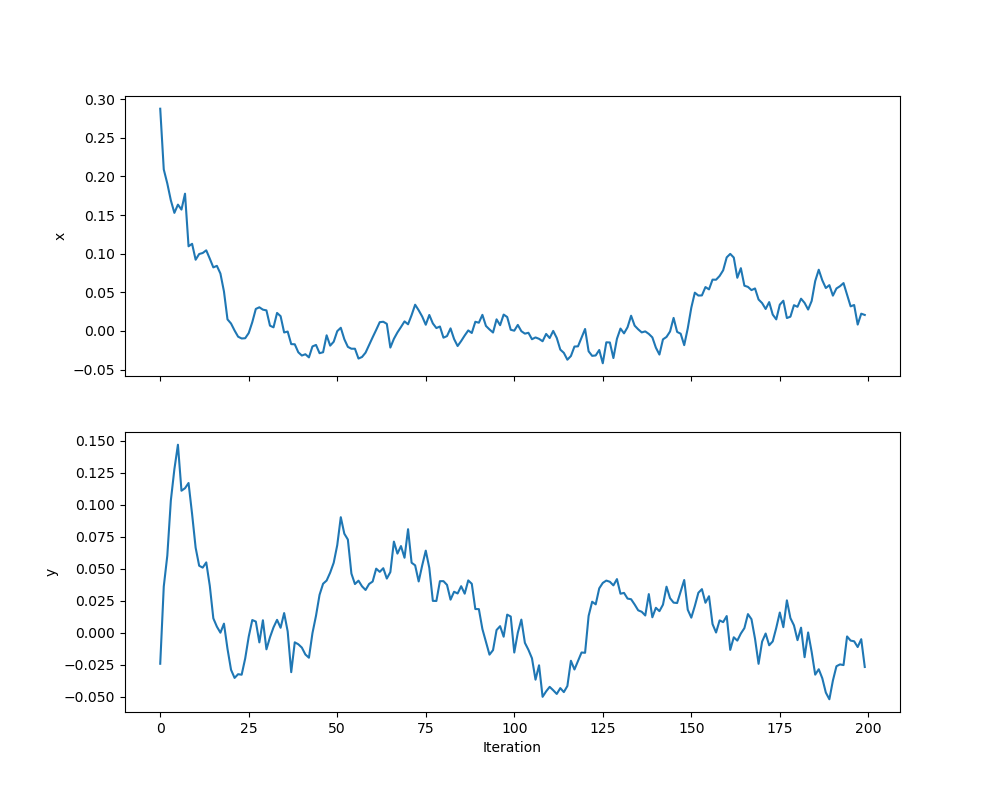

In [20]:
Image(filename="samples_chain.png", width=640, height=480)

**By default, this program will plot the average over all of the chains. This is why there was a single line. However, you can plot each chain separately by adding the option --chains all. Try it!**

### The acceptance rate

**This plots the acceptance rate , which for emcee is the average number of proposals that were accepted for each walker. (aka the acceptance fraction)**

**Note: for the emcee and emcee_pt samplers, the average is done over all iterations since the last checkpoint.**

In [21]:
!pycbc_inference_plot_acceptance_rate --input-file normal2d.hdf \
    --output-file acceptance_rate.png \
    --verbose

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1
2023-04-06T00:51:43.945-04:00 Reading input file
2023-04-06T00:51:43.948-04:00 Plotting acceptance fraction
2023-04-06T00:51:44.035-04:00 Done


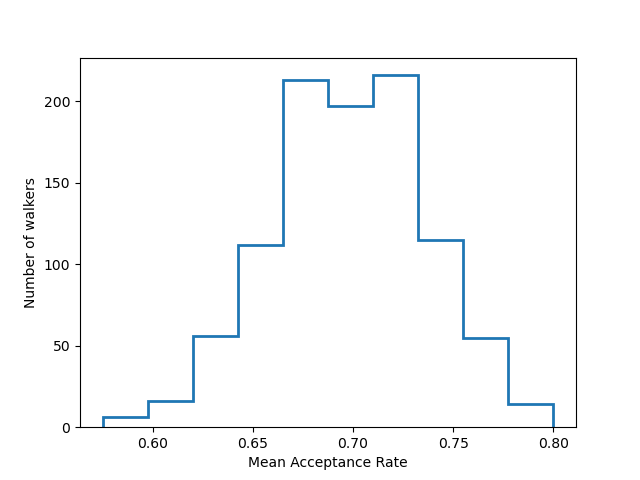

In [22]:
Image(filename="acceptance_rate.png", width=640, height=480)

### A movie of the results

**We can use pycbc_inference_plot_movie to make a movie showing how each of the walkers evolved with time.**

In [23]:
if False:
    !pycbc_inference_plot_movie --verbose \
        --nprocesses 4 \
        --input-file normal2d.hdf \
        --output-prefix frames-normal2d \
        --movie-file normal2d_mcmc_evolution.mp4 \
        --cleanup \
        --plot-scatter \
        --plot-contours \
        --plot-marginal \
        --z-arg 'loglikelihood:$\log p(h|\vartheta)$' \
        --frame-step 1

In [24]:
HTML("""
<video width="640" height="480" controls>
  <source src="normal2d_mcmc_evolution.mp4" type="video/mp4">
</video>
""")

# Other test distributions

**Several other test models exist in the pycbc.inference.models package. They are the models that begin with Test. The full list:**

'test_eggbox'	TestEggbox <br>
'test_normal'	TestNormal <br>
'test_prior'	TestPrior <br>
'test_rosenbrock'	TestRosenbrock <br>
'test_volcano'	TestVolcano <br>